
# Project: Analyzing No_Show_appointment dataset


<a id='intro'></a>
## Introduction

 This is the second project where we analyze and investigate a dataset. I have chose No_Show_appointment. first, I will try to find how many appointemnt are there, then show the prenetage of people who showed-up to thier appointment. After that, see the reasons why they didn't show-up.
 
Some of the questions I will try to answer: 

does the gender has affect the result?

does the age has relashinship with showing-up?

does the Neighbourhood an important factor ?

what is the difference between people who have Scholarship with people who don't have one ?

In [2]:
# First, importing the necessary libraries with the data
import pandas as pd,numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('No_Show_appointment.csv')


In [3]:
# getting overview of the data 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# to see how many rows and columns i have 
df.shape

(110527, 14)

In [54]:
#to get an idea about the datatype, missing values, n.of columns , etc.. 
def Summary():
    print(df.info(),'\n');
    print('The Shape is ',df.shape,'\n\n');
    print('The null values are: \n\n',df.isnull().sum())

Summary()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   PatientId       110527 non-null  int64   
 1   AppointmentID   110527 non-null  int64   
 2   Gender          110527 non-null  object  
 3   ScheduledDay    110527 non-null  object  
 4   AppointmentDay  110527 non-null  object  
 5   Age             110527 non-null  int64   
 6   Neighbourhood   110527 non-null  object  
 7   Scholarship     110527 non-null  int64   
 8   hypertension    110527 non-null  int64   
 9   Diabetes        110527 non-null  int64   
 10  Alcoholism      110527 non-null  int64   
 11  Handicap        110527 non-null  int64   
 12  SMS_received    110527 non-null  int64   
 13  No_Show         110527 non-null  object  
 14  GroupedAge      110526 non-null  category
dtypes: category(1), int64(9), object(5)
memory usage: 11.9+ MB
None 

The Shape is  (1105

In [5]:
# print a summary of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='wrangling'></a>
## Data Cleaning


In [9]:
# first we need to drop unused columns in this project
df.drop(['AppointmentID','AppointmentDay','ScheduledDay'], axis =1 , inplace = True)
df.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [34]:
#change the PatientID from float to integer

df['PatientId'] = df['PatientId'].astype('int64')


In [15]:
# rename some columns
df.rename(columns = {'Handcap':'Handicap','No-show':'No_Show','Hipertension':'hypertension'}, inplace = True)

In [17]:
# to see the min and max number of some columns 
np.sort(df.Handicap),np.sort(df.Age), np.sort(df.Scholarship),np.sort(df.SMS_received) 

(array([0, 0, 0, ..., 4, 4, 4], dtype=int64),
 array([ -1,   0,   0, ..., 115, 115, 115], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64))

In [18]:
# to check if there is any null values
df.isnull().sum()

PatientId        0
Gender           0
Age              0
Neighbourhood    0
Scholarship      0
hypertension     0
Diabetes         0
Alcoholism       0
Handicap         0
SMS_received     0
No_Show          0
dtype: int64

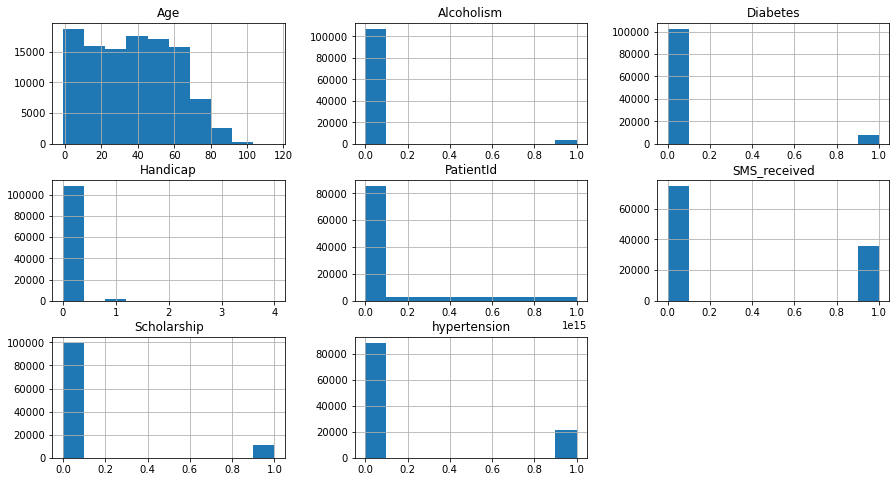

In [19]:
df.hist(figsize=(15,8));

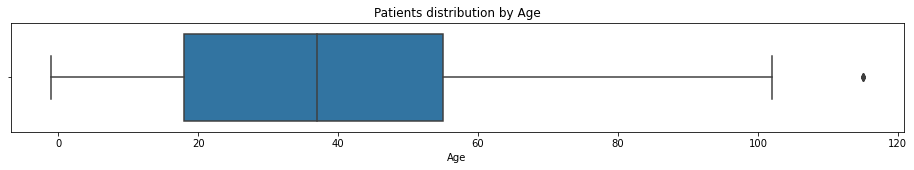

In [8]:
# we have to see the distribution of the Age by using boxplot

plt.figure(figsize=(16,2))
dist_age = sns.boxplot(x=df.Age)
dist_age.set_title("Patients distribution by Age")
plt.show()

In [21]:
# in the previos plot we can see that most of Ages are between 18-55
# also we have some outlier '-1' we need to drop it 
df = df.drop(df[df.Age < 0].index)

In [22]:
# to see the number of unique values in each column
df.nunique()

PatientId        62298
Gender               2
Age                103
Neighbourhood       81
Scholarship          2
hypertension         2
Diabetes             2
Alcoholism           2
Handicap             5
SMS_received         2
No_Show              2
dtype: int64

In [23]:
# Now we will do some analysis after the cleaning part 
# first we will see the precentage of missing appointemnts
ShowUp = df[df['No_Show']=='No']
NoShow = df[df['No_Show']=='Yes']
missing = len(NoShow)/len(df.Age)*100
Showed = len(ShowUp) /len(df.Age)* 100
print (missing,Showed)

20.193438647919944 79.80656135208005


In [24]:
ShowUp1 = df.No_Show == 'No'
NoShow1 = df.No_Show == 'Yes'
ShowUp1.equals(NoShow1)


False

In [25]:
# to see the average age of people who showup or missed the appointment 
df.Age[ShowUp1].mean(), df.Age[NoShow1].mean()

(37.790504154999034, 34.31766656212196)

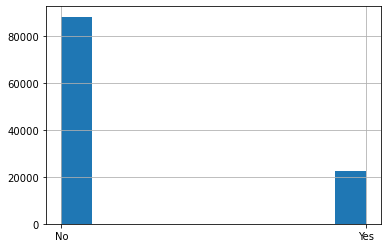

In [26]:
df.No_Show.hist();

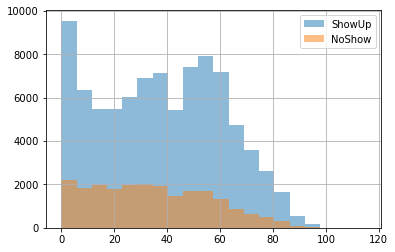

In [28]:
df.Age[ShowUp1].hist(alpha = 0.5,bins=20,label = 'ShowUp');
df.Age[NoShow1].hist(alpha = 0.5,bins=20,label = 'NoShow');
plt.legend()

In [13]:
# we need to make group age so that we can visualize it clearly

groups = [0,10,20,30,40,50,60,70,150]
labels = ['<10','10-20','20-30','30-40','40-50','50-60','60-70','>70']
df['GroupedAge'] = pd.cut(df['Age'],bins = groups,labels = labels , right= False)
df.groupby(['GroupedAge'])['PatientId'].count()

GroupedAge
<10      17475
10-20    12936
20-30    13699
30-40    15171
40-50    14209
50-60    15863
60-70    11876
>70       9297
Name: PatientId, dtype: int64

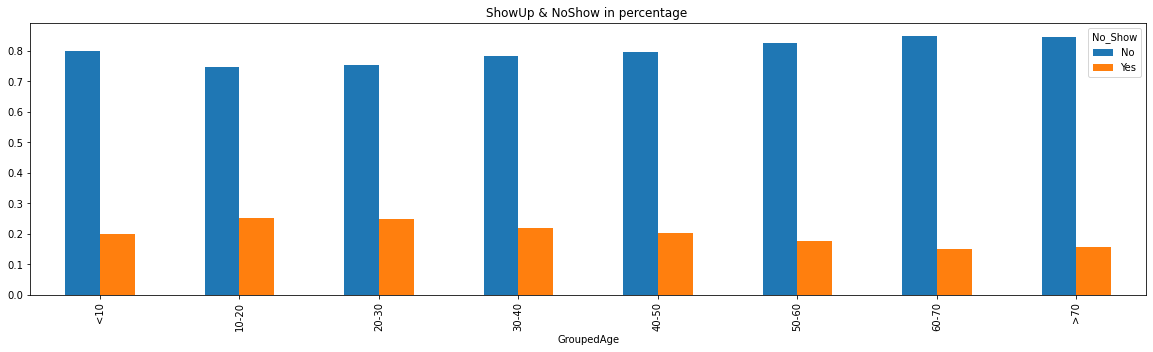

In [16]:
# plotting the groupAge 

Age = df.groupby('GroupedAge')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(20,5))
Age.set_title("ShowUp & NoShow in percentage ")
plt.show()

the ages that usually miss their appointments are between 10-30 

In [33]:
#Now let's see if the age has a relationship with missed appointment

gender = pd.DataFrame(df.groupby(['Gender','No_Show'])['PatientId'].count())
gender

PatientId
Gender No_Show           
F      No           57245
       Yes          14594
M      No           30962
       Yes           7725

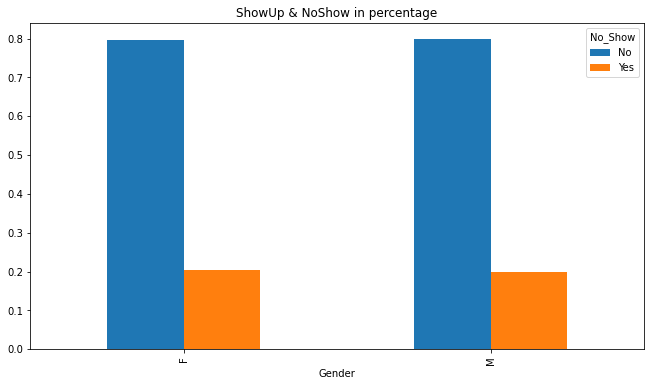

In [34]:
gender = df.groupby('Gender')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(11,6))
gender.set_title("ShowUp & NoShow in percentage")
plt.show()

we can see that the gender is not a factor in missed appointment 

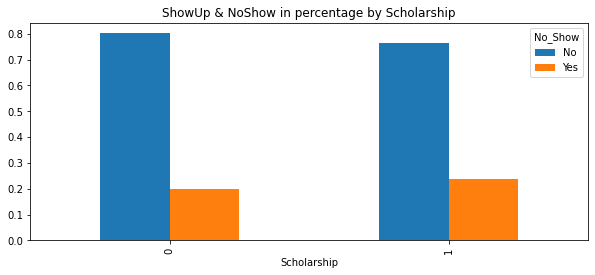

In [35]:
#Now let's see if the Scholarship has a relationship with missed appointment

Scholarship= df.groupby('Scholarship')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,4))
Scholarship.set_title("ShowUp & NoShow in percentage by Scholarship")
plt.show()

we notes that 80% of people who have Scholarship attend to their appointment, while 75% of
people who don't have a Scholarship attend to their appointment

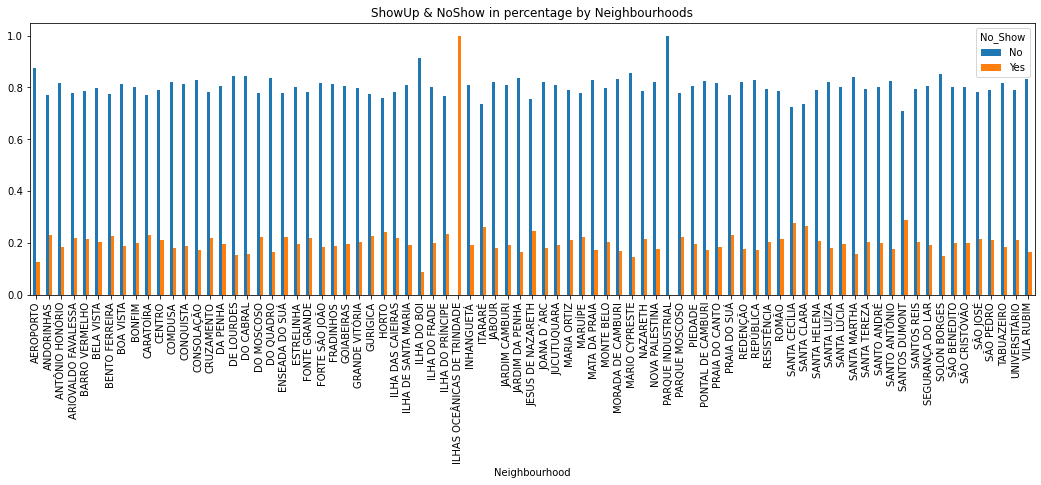

In [43]:
# Now let's see if the Neighbourhood has a relationship with missed appointment

Neighbourhood= df.groupby('Neighbourhood')['No_Show'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(18,5))
Neighbourhood.set_title("ShowUp & NoShow in percentage by Neighbourhoods");

From the chart above we can observe that the most of the Neighbourhood has around 20% of missing Appointment, but ILHAS OCEANICAS DE TRINDADE no one shows because 
there is only one patient

<a id='conclusions'></a>
## Conclusions

in this project I have analyzed the No-Show-Appointment dataset. and I tried to answer some of questions 

does the gender has affect to the result? No

does the age has relashinship with showing-up? Yes, the ages between 10-30 have a high precentage of missing appointments 

does the Neighbourhood an important factor ? No

what is the difference between people who have Scholarship with people who don't have one ? 80% of people who have a Scholarship have showed-up to their Apointment comparing to 75% for people who don't have a Scholarship

## Limitation 

We can not predict if the person would show-up or not because there is only 50 days or less of data that have beed collected. also, the data didn't mention the reason for booking the appointment, it would be helpful information. 